### **FRAUD TRANSACTION DETECTION PROJECT**

**Problem Statement:**
Fraud detection is a set of activities undertaken to prevent money or property from 
being obtained through false pretenses. Fraud detection is applied to many industries 
such as banking or insurance. In banking, fraud may include forging checks or using 
stolen credit cards. Other forms of fraud may involve exaggerating losses or causing an 
accident with the sole intent for the pay-out. With an unlimited and rising number of 
ways someone can commit fraud, detection can be difficult to accomplish. Fraud 
detection is a critical issue for retailers determined to prevent losses and preserve 
customer trust. 
Digitalization is one of the major advancements we have in this time. The global market 
is at the fingertip of each and every individual through Online purchase. Both for the 
consumers and sellers, online market tends to give more in terms of profit as well as 
exposure to a larger community. 
With the increase in digitalization, there is also increase in the fraudulent activities 
happening in various domains, mainly in the retail domain. These are detrimental to the 
ecosystem of online transactions. Machine learning provides an intelligent option in 
dealing with this challenge.


### **DATASET OVERVIEW:**

### Transaction features

Our focus will be on the most essential features of a transaction. In essence, a payment card transaction consists of any amount paid to a merchant by a customer at a certain time. The main features that summarize a transaction are:

- Transaction ID: A unique identifier for the transaction.

- Date and Time: The date and time at which the transaction occurs (TX_DATETIME).

- Customer ID: The identifier for the customer. Each customer has a unique identifier (CUSTOMER_ID).

- Terminal ID: The identifier for the merchant terminal. Each terminal has a unique identifier (TERMINAL_ID).

- Transaction Amount: The amount of the transaction (TX_AMOUNT).

- Transaction Time (Seconds): Time elapsed in seconds related to the transaction (TX_TIME_SECONDS).

- Transaction Time (Days): Time elapsed in days related to the transaction (TX_TIME_DAYS).

- Fraud Label: A binary variable, where `0` indicates a legitimate transaction and `1` indicates a fraudulent transaction (TX_FRAUD).

- Fraud Scenario: The specific type or scenario of fraud detected for a transaction (TX_FRAUD_SCENARIO).

These features will be referred to as `TRANSACTION_ID`, `TX_DATETIME`, `CUSTOMER_ID`, `TERMINAL_ID`, `TX_AMOUNT`, `TX_TIME_SECONDS`, `TX_TIME_DAYS`, `TX_FRAUD`, and `TX_FRAUD_SCENARIO`.

**IMPORTING BASIC LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import pickle
import warnings

warnings.filterwarnings("ignore")


### Extracting Dataset as DataFrame

In [ ]:
#from src.utils import read_from_files

#DIR_INPUT='../dataset/data/' 

#BEGIN_DATE = "2018-04-01"
#END_DATE = "2018-09-30"

##print("Load  files")
#transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
#print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))


#transactions_df.to_csv("../dataset/card_fraud.csv" , index=False , header=True)

In [ ]:
df = pd.read_csv("../dataset/card_fraud.csv")
df.head()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [ ]:
df.shape

(1754155, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


### Convert datetime Column from Object to datetime64 Format

In [ ]:
df["TX_DATETIME"]

0          2018-04-01 00:00:31
1          2018-04-01 00:02:10
2          2018-04-01 00:07:56
3          2018-04-01 00:09:29
4          2018-04-01 00:10:34
                  ...         
1754150    2018-09-30 23:56:36
1754151    2018-09-30 23:57:38
1754152    2018-09-30 23:58:21
1754153    2018-09-30 23:59:52
1754154    2018-09-30 23:59:57
Name: TX_DATETIME, Length: 1754155, dtype: object

In [ ]:
df["TX_DATETIME"]=pd.to_datetime(df["TX_DATETIME"])
df["TX_DATETIME"].dtype

dtype('<M8[ns]')

In [ ]:
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1754155,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2018-07-01 11:20:33.708572160,2.504011e+03,4.996733e+03,5.363230e+01,7.903234e+06,9.097260e+01,8.369272e-03,1.882388e-02
min,0.000000e+00,2018-04-01 00:00:31,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,2018-05-16 14:40:46.500000,1.252000e+03,2.502000e+03,2.101000e+01,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2018-07-01 11:11:10,2.506000e+03,4.994000e+03,4.464000e+01,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,2018-08-16 08:01:01.500000,3.765000e+03,7.495000e+03,7.695000e+01,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,2018-09-30 23:59:57,4.999000e+03,9.999000e+03,2.628000e+03,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00
std,5.063811e+05,NaN,1.445987e+03,2.886101e+03,4.232649e+01,4.565172e+06,5.283709e+01,9.110012e-02,2.113263e-01


###  Count Fraud vs. Non-Fraud Transactions

In [ ]:
fraud_count = df['TX_FRAUD'].value_counts()
print(fraud_count)

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


### **EDA & FEATURE ENGINEERING**

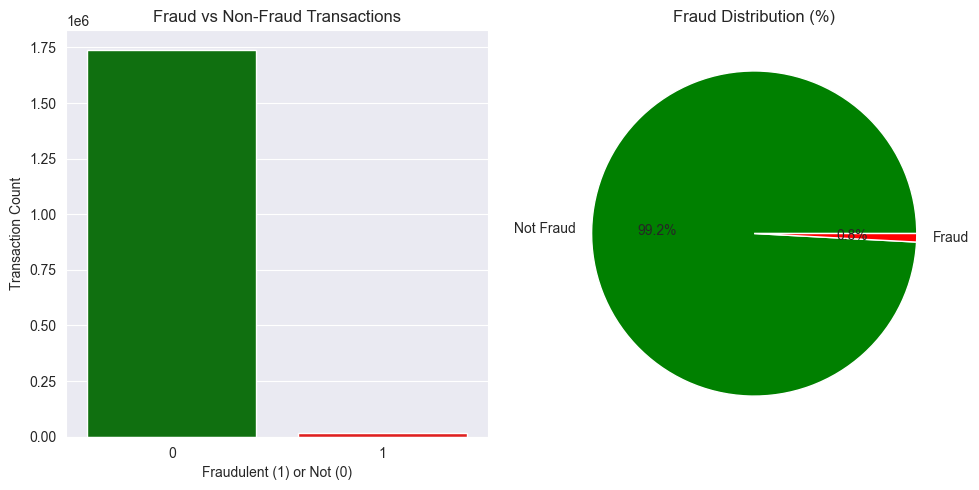

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set Seaborn style
sns.set_style("darkgrid")
sns.set_palette("Set2")

# Calculate fraud counts
fraud_count = df['TX_FRAUD'].value_counts()

# Convert to DataFrame for barplot
fraud_df = fraud_count.reset_index()
fraud_df.columns = ['Fraud', 'Count']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Barplot
sns.barplot(data=fraud_df, x='Fraud', y='Count', palette=["green", "red"], ax=ax1)
ax1.set_title("Fraud vs Non-Fraud Transactions")
ax1.set_xlabel("Fraudulent (1) or Not (0)")
ax1.set_ylabel("Transaction Count")

# Pie chart
labels = ['Not Fraud', 'Fraud'] if 0 in fraud_count.index else ['Fraud', 'Not Fraud']
ax2.pie(fraud_count, labels=labels, autopct='%1.1f%%', colors=["green", "red"])
ax2.set_title("Fraud Distribution (%)")

plt.tight_layout()
plt.show()


### 📝 **Observation**:
- By observing the plot, we can see that there are a total of 1,739,474 transactions labeled as 0, which indicates safe (non-fraudulent) transactions.

- There are 14,681 transactions labeled as 1, indicating fraudulent transactions.

- The dataset is highly imbalanced, which can severely affect model training and lead to poor performance, especially in detecting fraud cases

In [ ]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [ ]:
df.reset_index(drop=True)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0


### converting a datetime column to hour and weekday in a Pandas DataFrame:



In [ ]:
df["TX_HOUR"]=df["TX_DATETIME"].dt.hour
df["TX_WEEK_DAY"]=df["TX_DATETIME"].dt.day_of_week

df[['TX_HOUR' , 'TX_WEEK_DAY']]

,TX_HOUR,TX_WEEK_DAY
0,0,6
1,0,6
2,0,6
3,0,6
4,0,6
...,...,...
1754150,23,6
1754151,23,6
1754152,23,6
1754153,23,6


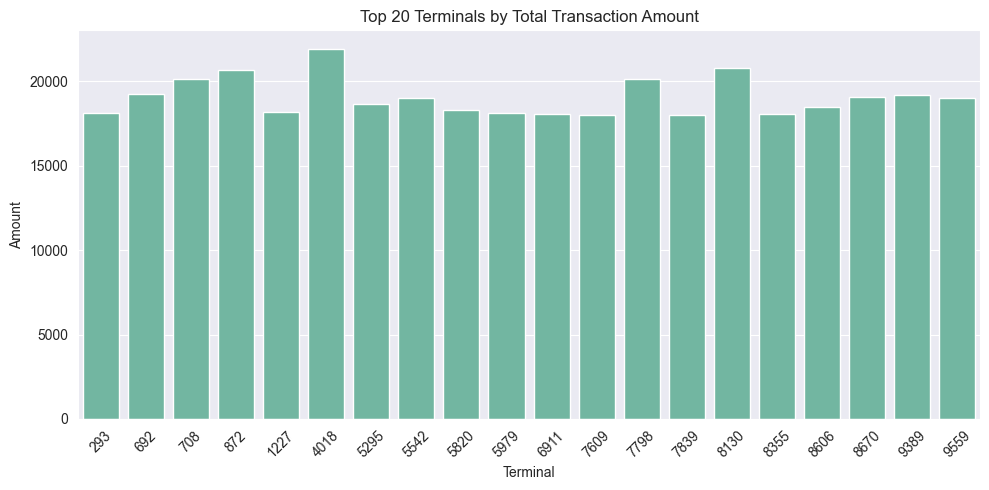

In [ ]:
# Group by TERMINAL_ID, sum TX_AMOUNT, reset index and sort descending
terminal_transaction = (
    df.groupby("TERMINAL_ID")["TX_AMOUNT"]
    .sum()
    .reset_index()
    .sort_values(by="TX_AMOUNT", ascending=False)
)

# Rename columns for clarity
terminal_transaction.columns = ["Terminal", "Amount"]

# Optional: plot top 20 terminals only (avoid clutter)
top_terminals = terminal_transaction.head(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=top_terminals, x="Terminal", y="Amount")
plt.xticks(rotation=45)
plt.title("Top 20 Terminals by Total Transaction Amount")
plt.tight_layout()
plt.show()


### Transaction volumes are relatively balanced across most top terminals


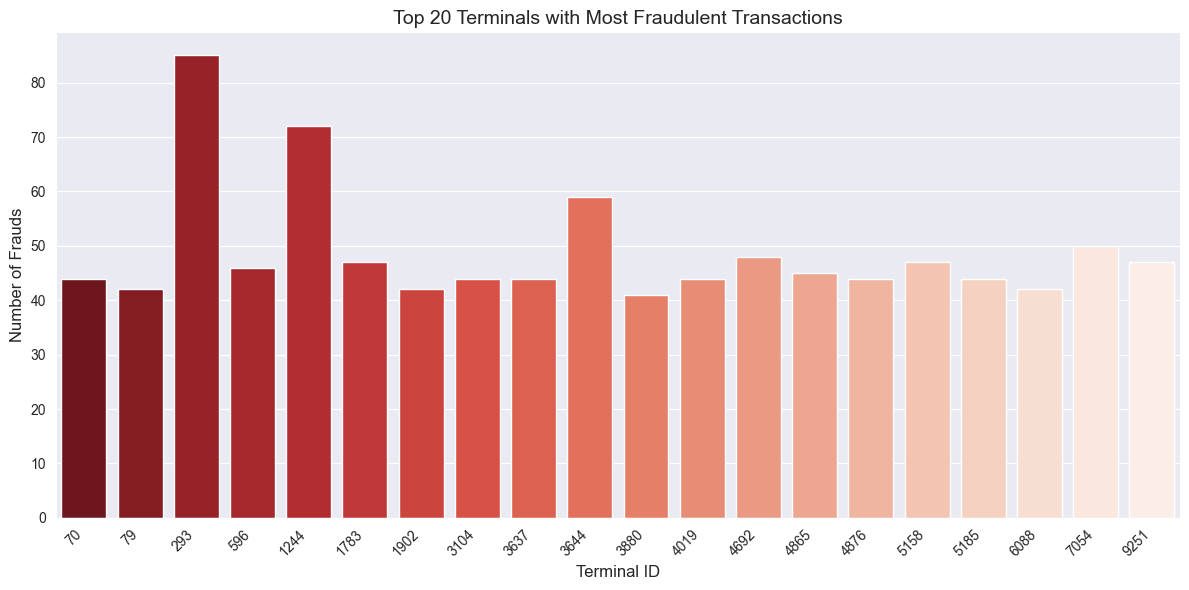

In [ ]:
# Filter only fraudulent transactions
fraud_df = df[df["TX_FRAUD"] == 1]

# Group by terminal and count the number of frauds
terminal_fraud_transaction = (
    fraud_df.groupby("TERMINAL_ID")["TX_FRAUD"]
    .count()
    .sort_values(ascending=False)
    .head(20)  # Top 20 terminals with most frauds
    .reset_index()
)

# Rename columns for clarity
terminal_fraud_transaction.columns = ["Terminal", "Fraud Count"]

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(data=terminal_fraud_transaction, x="Terminal", y="Fraud Count", palette="Reds_r")

# Improve aesthetics
plt.title("Top 20 Terminals with Most Fraudulent Transactions", fontsize=14)
plt.xlabel("Terminal ID", fontsize=12)
plt.ylabel("Number of Frauds", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


### Obervation:

From the analysis of fraudulent transactions, we observe that the terminals 293, 1244, and 3644 are the most affected by fraud. Interestingly, the number of fraud transactions across these terminals is almost equal, indicating a balanced distribution of fraud attempts across multiple terminals rather than a heavy concentration on a single one.

This could imply:

Fraudsters are spreading their activity to avoid detection.

These terminals might be located in areas with higher fraud risk.



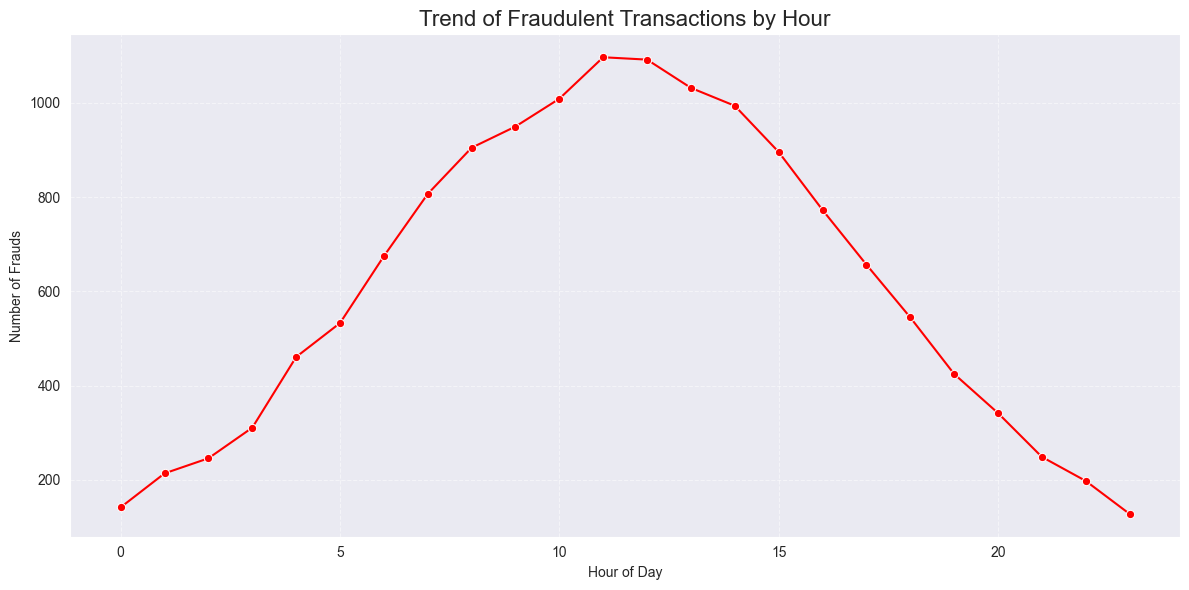

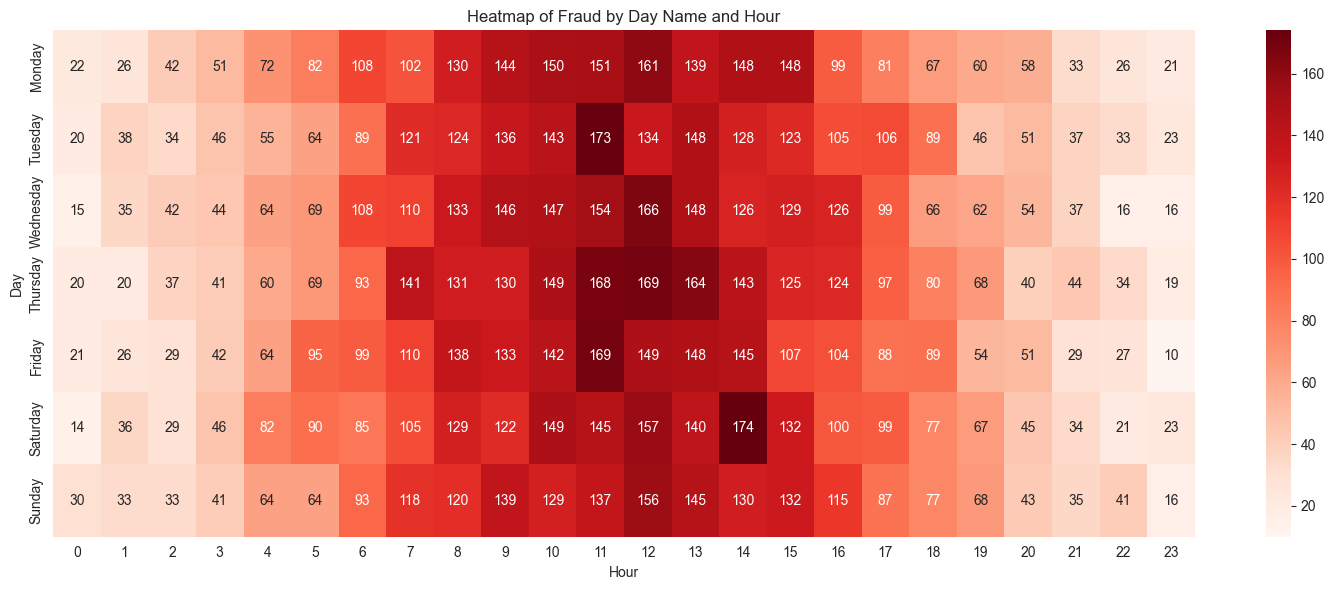

In [ ]:
# Fraud by Hour: Line Plot
fraud_by_hour = (
    df[df["TX_FRAUD"] == 1]                            # Filter for frauds only
    .groupby("TX_HOUR")["TX_FRAUD"].count()           # Count frauds per hour
    .sort_values(ascending=False)                     # Sort by highest fraud count
    .head(30)                                         # Top 30 (or fewer if 24-hour data)
    .reset_index()                                    # Convert to DataFrame
)
fraud_by_hour.columns = ["Hour", "Fraud"]             # Rename columns

plt.figure(figsize=(12, 6))
sns.lineplot(x="Hour", y="Fraud", data=fraud_by_hour, marker="o", color="red")
plt.title("Trend of Fraudulent Transactions by Hour", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Frauds")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 1: Map day numbers to names
day_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
df["TX_DAY_NAME"] = df["TX_WEEK_DAY"].map(day_map)

# Step 2: Pivot and reindex to order days correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot = (
    df[df["TX_FRAUD"] == 1]
    .pivot_table(index="TX_DAY_NAME", columns="TX_HOUR", values="TX_FRAUD", aggfunc="count", fill_value=0)
    .reindex(weekday_order)
)

# Step 3: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap of Fraud by Day Name and Hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.tight_layout()
plt.show()


### 📌 Observations from Fraud Time Analysis
**Peak Fraud Hours:**
Most fraudulent transactions occur between 10:00 AM and 3:00 PM (hours 10 to 15), suggesting fraudsters may be attempting to blend into normal business traffic.

**High-Risk Days:**
The highest fraud activity is observed from Tuesday to Friday, which falls in the mid-week window.

**Temporal Pattern Insight:**
This pattern indicates fraud may be strategically timed to align with peak transaction periods during working hours and mid-week days when monitoring may be less stringent or systems are more active.

### Analyzing Customer Behaviour and Trends

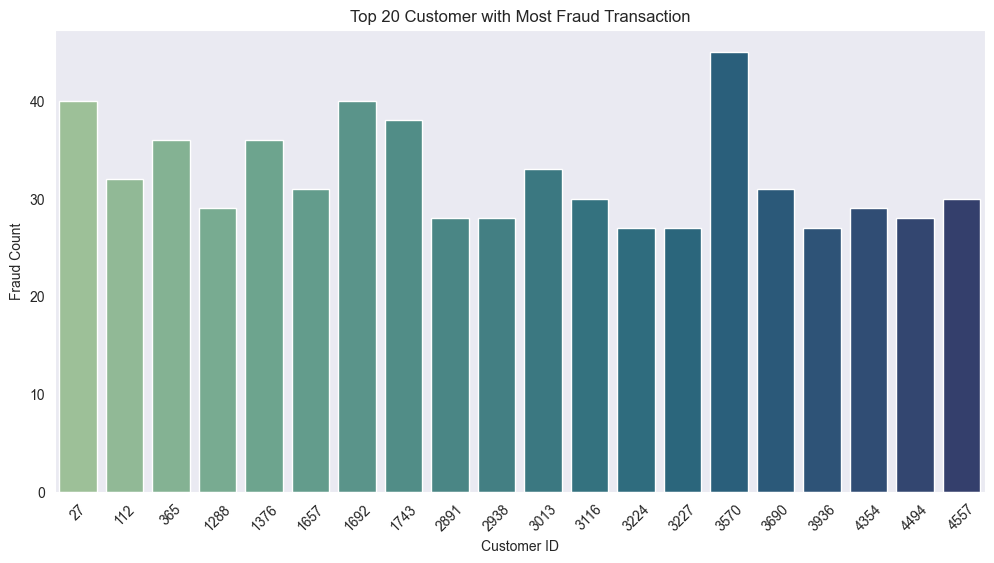

In [ ]:
customer_fraud=df[df["TX_FRAUD"]==1].groupby("CUSTOMER_ID")["TX_FRAUD"].count().sort_values(ascending=False).head(20).reset_index()
customer_fraud.columns=["Customer" , "Fraud count"]


plt.figure(figsize=(12,6))
sns.set_style("dark")
sns.barplot(data=customer_fraud , x="Customer" , y="Fraud count"  , palette='crest')
plt.title("Top 20 Customer with Most Fraud Transaction")
plt.xlabel("Customer ID")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


**These are Customers with the Most Fraudulent Transactions.**

### Analyzing Customer Fraud by Terminal

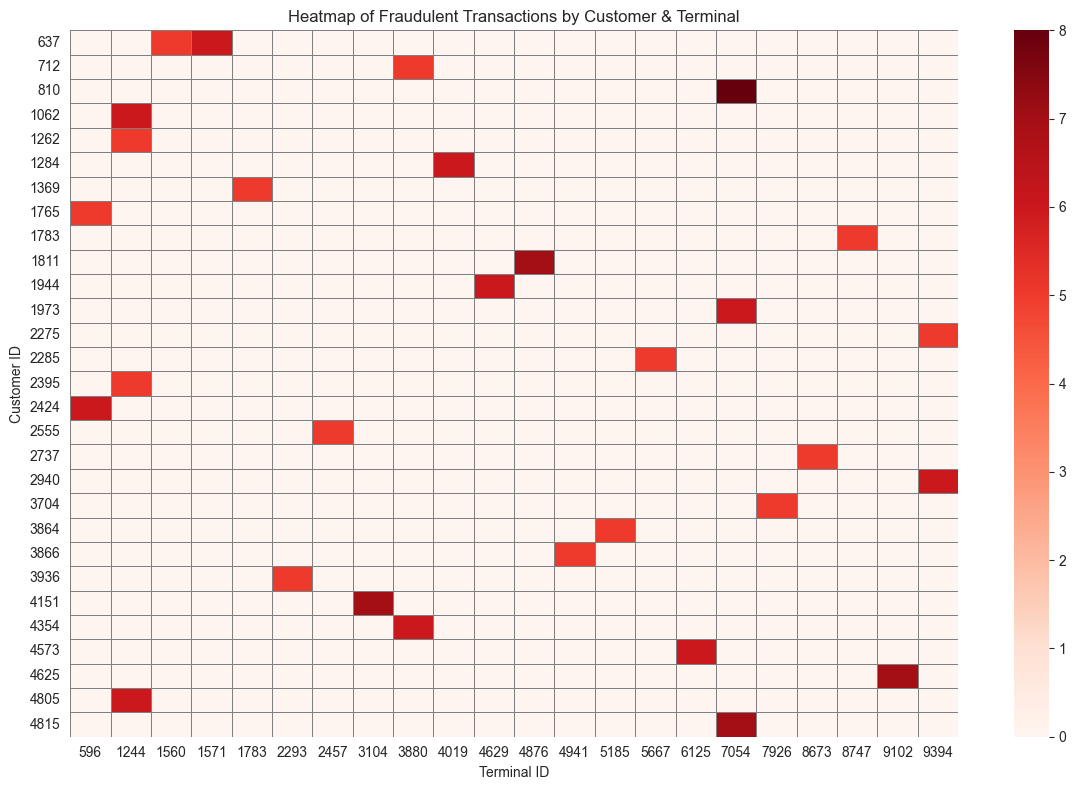

In [ ]:
fraud_pairs = (
    df[df["TX_FRAUD"] == 1]  # Filter only frauds
    .groupby(["CUSTOMER_ID", "TERMINAL_ID"])["TX_FRAUD"]
    .count()
    .reset_index()
    .rename(columns={"TX_FRAUD": "Fraud_Count"})
    .sort_values("Fraud_Count", ascending=False).head(30)
)
fraud_pairs

# Pivot to create a heatmap-friendly format
heatmap_data = fraud_pairs.pivot_table(
    index="CUSTOMER_ID",
    columns="TERMINAL_ID",
    values="Fraud_Count",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor='gray' )
plt.title("Heatmap of Fraudulent Transactions by Customer & Terminal")
plt.xlabel("Terminal ID")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


### Fraud Heatmap Observation

By analyzing the heatmap of fraudulent transactions by Customer ID and Terminal ID, we can interpret the following:

Darker colors in the heatmap indicate a higher number of frauds associated with that specific customer-terminal pair. This means the customer has a strong fraudulent activity pattern with that terminal.

Conversely, lighter or white colors represent fewer or no frauds, indicating less suspicious activity between the customer and terminal.

Specifically, some notable high-fraud pairs include:

- Customer 4815 at Terminal 7054

- Customer 4805 at Terminal 1244

- Customer 4625 at Terminal 9102

- Customer 810 at Terminal 7054 .

- Customer 4151 at Terminal 3104 .

- Customer 1811 at Terminal 4876  etc.


### Converting Additional Features:

In [ ]:
df["TX_FRAUD_SCENARIO"].unique()

array([0, 1, 3, 2], dtype=int64)

## **Summary of Fraud Scenarios:**

### **Scenario 1** – Obvious High-Value Fraud
Rule:
Any transaction where TX_AMOUNT > 220 is marked as fraud.

**Purpose:**
Acts as a sanity check to validate if your system detects obvious frauds.

### Detection Tip:
Use rule-based or simple threshold models.

---

### **Scenario 2** – Compromised Terminals

Rule:
Each day, 2 terminals are randomly selected.
All transactions on them for the next 28 days are marked as fraud.

Real-World Analog:
POS malware, skimming, or phishing of a terminal.

Detection Tip:
Track fraud activity per terminal over time
Consider concept drift (terminal is not always compromised).

---
### **Scenario 3 – Stolen Card / Account Takeover**
Rule:
Each day, 3 customers are randomly selected.
For the next 14 days, 1/3 of their transactions are:

Amount multiplied by 5

Marked as fraud

Real-World Analog:
Card-not-present fraud, account takeover, leaked credentials

Detection Tip:
Track changes in customer spending patterns
Handle concept drift: the account is temporarily compromised

---
### Encoded Values of TX_FRAUD_SCENARIO
**Encoded Value**	**Description**

0: No Fraud

1: Amount > 220

2: Terminal Compromised

3: Customer Compromised



### It is advisable to drop the Tx_Scenario column since it is strongly related to the target variable, which could lead to data leakage.

In [ ]:
# Ensure datetime and sort
df = df.sort_values('TX_DATETIME')

# ---------- Scenario 1: High Amount ----------
df['IS_TX_AMOUNT_HIGH'] = (df['TX_AMOUNT'] > 220).astype(int)

# ---------- Scenario 2: Terminal-Based Fraud (last 7 days) ----------
# Group by terminal and TX_TIME_DAYS for rolling stats
terminal_agg = df.groupby(['TERMINAL_ID', 'TX_TIME_DAYS']) \
    .agg(
        terminal_tx_count=('TRANSACTION_ID', 'count'),
        terminal_fraud_count=('TX_FRAUD', 'sum')
    ).reset_index()

# Rolling over last 7 days
terminal_agg['terminal_tx_count_7d'] = terminal_agg.groupby('TERMINAL_ID')['terminal_tx_count'].transform(lambda x: x.rolling(7, min_periods=1).sum())

# Merge back
df = df.merge(
    terminal_agg[['TERMINAL_ID', 'TX_TIME_DAYS', 'terminal_tx_count_7d']],
    on=['TERMINAL_ID', 'TX_TIME_DAYS'],
    how='left'
)

# ---------- Scenario 3: Customer-Based Fraud (last 7 days) ----------
customer_agg = df.groupby(['CUSTOMER_ID', 'TX_TIME_DAYS']) \
    .agg(
        customer_tx_count=('TRANSACTION_ID', 'count'),
        customer_avg_amount=('TX_AMOUNT', 'mean'),
        customer_max_amount=('TX_AMOUNT', 'max')
    ).reset_index()

# Rolling over 7 days
customer_agg['customer_tx_count_7d'] = customer_agg.groupby('CUSTOMER_ID')['customer_tx_count'].transform(lambda x: x.rolling(7, min_periods=1).sum())
customer_agg['customer_avg_amount_7d'] = customer_agg.groupby('CUSTOMER_ID')['customer_avg_amount'].transform(lambda x: x.rolling(7, min_periods=1).mean())
customer_agg['customer_max_amount_7d'] = customer_agg.groupby('CUSTOMER_ID')['customer_max_amount'].transform(lambda x: x.rolling(7, min_periods=1).max())

# Merge back
df = df.merge(
    customer_agg[['CUSTOMER_ID', 'TX_TIME_DAYS', 'customer_tx_count_7d', 'customer_avg_amount_7d', 'customer_max_amount_7d']],
    on=['CUSTOMER_ID', 'TX_TIME_DAYS'],
    how='left'
)

# Sort the DataFrame by CUSTOMER_ID and TX_DATETIME
df = df.sort_values(['CUSTOMER_ID'])

# Group by CUSTOMER_ID and calculate the expanding mean of TX_AMOUNT, shifting by 1 to avoid leakage
df['AVG_AMOUNT_CUSTOMER'] = (
    df.groupby('CUSTOMER_ID')['TX_AMOUNT']
      .transform(lambda x: x.shift(1).expanding().mean())
)

# Extra feature: TX amount compared to 5x customer's average
df['IS_TX_5X_AVG'] = (df['TX_AMOUNT'] > 5 * df['AVG_AMOUNT_CUSTOMER']).astype(int)

# ---------- Optional: Night Time Flag ----------
df['IS_NIGHT_TX'] = df['TX_HOUR'].apply(lambda x: 1 if x < 6 else 0)

df["TX_IS_WEEKEND"]=df["TX_DAY_NAME"].isin(['Saturday' ,'Sunday']).astype(int)


🧪 **Resulting New Features**

| Feature Name             | Description                                               |
|--------------------------|-----------------------------------------------------------|
| `IS_TX_AMOUNT_HIGH`      | Flag if TX amount > 220                                   |
| `terminal_tx_count_7d`   | Rolling 7-day count of terminal transactions              |
| `customer_tx_count_7d`   | Rolling 7-day count of customer transactions              |
| `customer_avg_amount_7d` | Rolling 7-day average TX amount per customer              |
| `customer_max_amount_7d` | Rolling 7-day max TX amount per customer                  |
| `IS_TX_5X_AVG`           | Flag if TX is 5× usual customer spend                     |
| `IS_NIGHT_TX`            | Flag for night-time transaction (TX_HOUR < 6)             |
| `TX_IS_WEEKEND`          | Flag for weekend — Saturday or Sunday (`True` or `False`) |


### **FEATURE SELECTION**

In [ ]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_HOUR', 'TX_WEEK_DAY', 'TX_DAY_NAME',
       'IS_TX_AMOUNT_HIGH', 'terminal_tx_count_7d', 'customer_tx_count_7d',
       'customer_avg_amount_7d', 'customer_max_amount_7d',
       'AVG_AMOUNT_CUSTOMER', 'IS_TX_5X_AVG', 'IS_NIGHT_TX', 'TX_IS_WEEKEND'],
      dtype='object')

### **Droping Unwanted Features or Features that might cause data leakage**

In [ ]:
X=df.drop(['TRANSACTION_ID' ,'TX_DATETIME' ,'CUSTOMER_ID' , 'TERMINAL_ID' , 'TX_FRAUD' ,'TX_DAY_NAME' ,'TX_FRAUD_SCENARIO' ] , axis=1)
y=df["TX_FRAUD"]

In [ ]:
print(X.shape)
print(y.shape)

(1754155, 14)
(1754155,)


In [ ]:
X.isnull().sum()

TX_AMOUNT                    0
TX_TIME_SECONDS              0
TX_TIME_DAYS                 0
TX_HOUR                      0
TX_WEEK_DAY                  0
IS_TX_AMOUNT_HIGH            0
terminal_tx_count_7d         0
customer_tx_count_7d         0
customer_avg_amount_7d       0
customer_max_amount_7d       0
AVG_AMOUNT_CUSTOMER       4990
IS_TX_5X_AVG                 0
IS_NIGHT_TX                  0
TX_IS_WEEKEND                0
dtype: int64

In [ ]:
X.fillna(X["AVG_AMOUNT_CUSTOMER"].mean() , inplace=True)
X.isnull().sum()

TX_AMOUNT                 0
TX_TIME_SECONDS           0
TX_TIME_DAYS              0
TX_HOUR                   0
TX_WEEK_DAY               0
IS_TX_AMOUNT_HIGH         0
terminal_tx_count_7d      0
customer_tx_count_7d      0
customer_avg_amount_7d    0
customer_max_amount_7d    0
AVG_AMOUNT_CUSTOMER       0
IS_TX_5X_AVG              0
IS_NIGHT_TX               0
TX_IS_WEEKEND             0
dtype: int64

In [ ]:
X

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_HOUR,TX_WEEK_DAY,IS_TX_AMOUNT_HIGH,terminal_tx_count_7d,customer_tx_count_7d,customer_avg_amount_7d,customer_max_amount_7d,AVG_AMOUNT_CUSTOMER,IS_TX_5X_AVG,IS_NIGHT_TX,TX_IS_WEEKEND
1758,123.59,26345,0,7,6,0,3.0,3.0,82.480000,123.59,53.633522,0,0,1
8640,46.51,68522,0,19,6,0,2.0,3.0,82.480000,123.59,123.590000,0,0,1
1451553,54.52,13087077,151,11,3,0,13.0,16.0,79.688500,135.10,85.050000,0,0,0
1006703,40.87,9062218,104,21,5,0,13.0,13.0,55.351548,102.30,74.873333,0,0,1
140531,120.89,1260839,14,14,6,0,16.0,15.0,50.794238,120.89,66.372500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660121,15.81,5936517,68,17,4,0,15.0,16.0,34.954524,80.40,40.141224,0,0,0
1720835,63.50,15509304,179,12,3,0,10.0,21.0,41.539548,92.51,40.090000,0,0,0
1205555,54.97,10855456,125,15,5,0,9.0,22.0,43.274286,102.81,40.139181,0,0,1
617664,56.50,5567900,64,10,0,0,8.0,18.0,39.807619,70.27,40.170273,0,0,0


In [ ]:
y

1758       0
8640       0
1451553    0
1006703    0
140531     0
          ..
660121     0
1720835    0
1205555    0
617664     0
398771     0
Name: TX_FRAUD, Length: 1754155, dtype: int64

### Handling Imbalanced Target by Balancing Majority and Minority Classes


In [ ]:
y.value_counts()

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

# 1. Combine X and y into a full DataFrame
full_df = pd.concat([X, y], axis=1)

# 2. Separate majority and minority classes
df_majority = full_df[full_df['TX_FRAUD'] == 0]
df_minority = full_df[full_df['TX_FRAUD'] == 1]

# 3. Downsample majority class to desired number (e.g., under 1,00,000 out of 1.7 million)
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=30000,
                                   random_state=42)

# 4. Combine downsampled majority with minority (all minority kept)
balanced_df = pd.concat([df_majority_downsampled, df_minority])

# 5. Shuffle balanced dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Split into features and target
X_balanced = balanced_df.drop('TX_FRAUD', axis=1)
y_balanced = balanced_df['TX_FRAUD']

# 7. Now split balanced data into train and test sets (e.g., 70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

# 8. Apply SMOTE **only on the training set**
smote = SMOTE( random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
y_train_smote.value_counts()

TX_FRAUD
0    349999
1    349999
Name: count, dtype: int64

## **Model Training**

In [ ]:
# Importing various machine learning models for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier (SVC)
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Ensemble methods (Random Forest, AdaBoost, Gradient Boosting)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  # Importing metrics for model evaluation
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier

# Defining a dictionary of models to evaluate
models = {
    "RandomForest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier() , 
    "LogisticRegression": LogisticRegression() ,
    "DecisionTreeClassifier":DecisionTreeClassifier() ,
}

# Function to train and evaluate different machine learning models
def model_training(models, X_train, X_test, y_train, y_test):
    # Initialize an empty list to store results
    results = []
    
    # Print a message to indicate the start of model training
    print(f'{">"*20 } Started Training Models {"<"*20}')
    
    # Loop through each model in the provided dictionary of models
    for name, model in models.items():
        print(f'\n\nTraining {name} Model.....')  # Indicate which model is being trained
        
        # Train the model using the training data
        model.fit(X_train, y_train)
        
        # Predict the labels on the test set
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        accu_score = accuracy_score(y_test, y_pred)  # Accuracy score
        print(f"Accuracy Score for {name} Model: {accu_score}")
        
        pre_score = precision_score(y_test, y_pred)  # Precision score
        rec_score = recall_score(y_test, y_pred)  # Recall score
        f1score = f1_score(y_test, y_pred)  # F1 score
        
        # Store the results in a dictionary and append to the results list
        results.append({
            "Model": name,
            "accuracy_score": accu_score,
            "precision_score": pre_score,
            "recall_score": rec_score,
            "f1_score": f1score
        })
    
    # Convert the results list to a pandas DataFrame for better visualization
    results = pd.DataFrame(results)
    
    # Return the results DataFrame
    return results

results=model_training(models,X_train ,X_test , y_train ,  y_test)

>>>>>>>>>>>>>>>>>>>> Started Training Models <<<<<<<<<<<<<<<<<<<<


Training RandomForest Classifier Model.....
Accuracy Score for RandomForest Classifier Model: 0.9712120721479227


Training XGBClassifier Model.....
Accuracy Score for XGBClassifier Model: 0.9808620187170105


Training DecisionTreeClassifier Model.....
Accuracy Score for DecisionTreeClassifier Model: 0.940086137106959


Training AdaBoostClassifier Model.....
Accuracy Score for AdaBoostClassifier Model: 0.9543991451054046


Training LogisticRegression Model.....
Accuracy Score for LogisticRegression Model: 0.8753149185583369


In [ ]:
results

,Model,accuracy_score,precision_score,recall_score,f1_score
0,RandomForest Classifier,0.971212,0.493868,0.374886,0.426230
1,XGBClassifier,0.980862,0.946946,0.348547,0.509544
2,DecisionTreeClassifier,0.940086,0.205850,0.385104,0.268291
3,AdaBoostClassifier,0.954399,0.261444,0.328111,0.291008
4,LogisticRegression,0.875315,0.107154,0.459809,0.173805


In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train , y_train)
train_pred=rf_model.predict(X_train)
test_pred=rf_model.predict(X_test)
print(f'Train Score {accuracy_score( y_train , train_pred)}')
print(f'Test Score {accuracy_score( y_test , test_pred)}')

Train Score 0.9999985714244898
Test Score 0.9715488488067097


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[148356   1645]
 [  2748   1656]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    150001
           1       0.50      0.38      0.43      4404

    accuracy                           0.97    154405
   macro avg       0.74      0.68      0.71    154405
weighted avg       0.97      0.97      0.97    154405



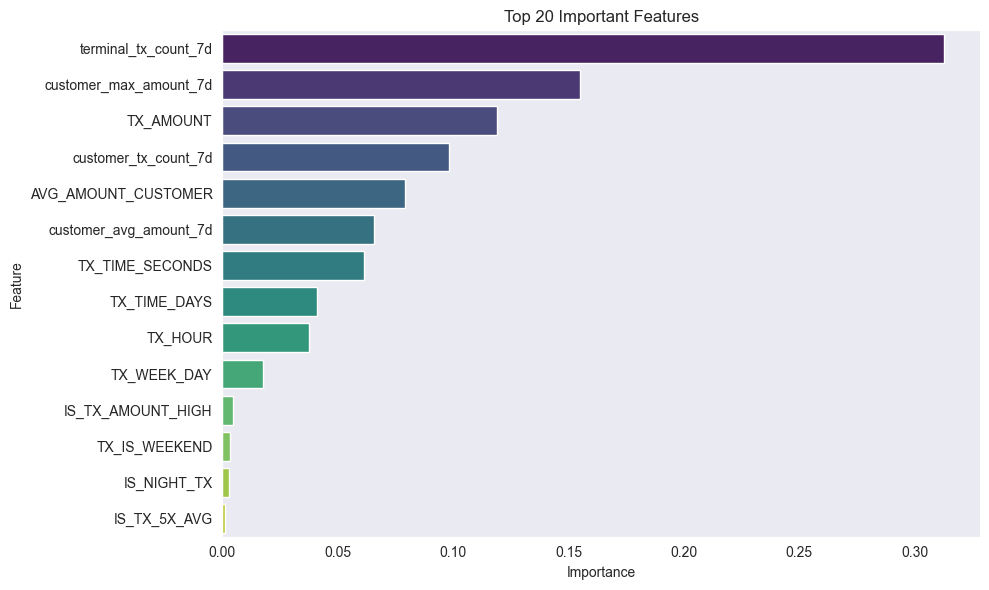

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is already trained and X_train_bal is your input
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()
